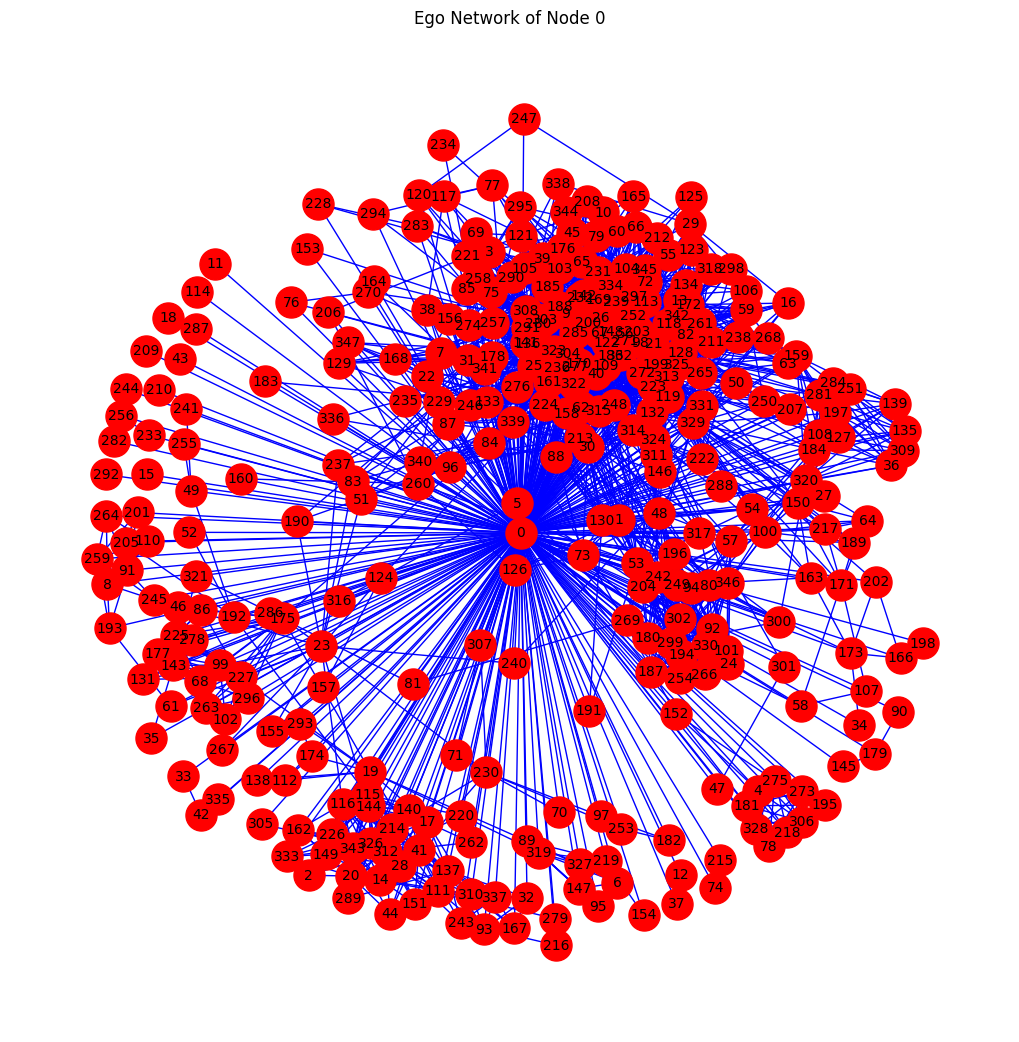

In [8]:
# Task 1 : Data Preparation & Developing Ego Network
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
G = nx.read_edgelist('facebook_combined.txt', nodetype=int)

# Select an ego network (e.g., node 1)
ego_node = 0
ego_network = nx.ego_graph(G, ego_node)


# Draw the ego network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(ego_network)
nx.draw(ego_network, pos, node_color='red', with_labels=True, node_size=500, font_size=10, edge_color='blue')
plt.title(f'Ego Network of Node {ego_node}')
plt.show()


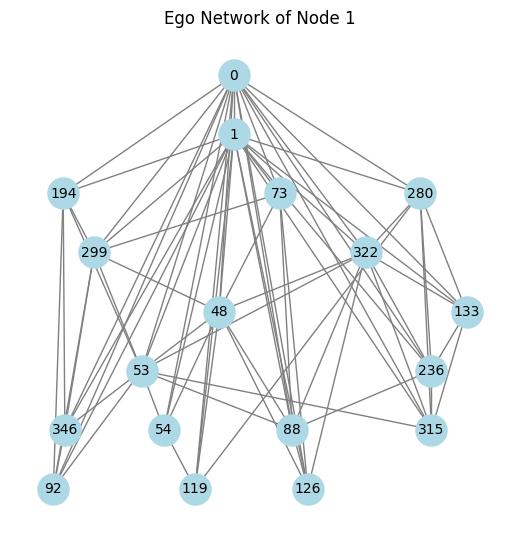

In [7]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

# Load the dataset
G = nx.read_edgelist('facebook_combined.txt', nodetype=int)

# Select an ego network (e.g., node 0)
ego_node = 1
ego_network = nx.ego_graph(G, ego_node)


# Visualize the ego network using GraphViz
pos = graphviz_layout(ego_network, prog='dot')
plt.figure(figsize=(5, 5))
nx.draw(ego_network, pos, node_color='lightblue', with_labels=True, node_size=500, font_size=10, edge_color='gray')
plt.title(f'Ego Network of Node {ego_node}')
plt.show()


Degrees of the top 50 nodes:
Node 0: Degree 347
Node 56: Degree 78
Node 67: Degree 76
Node 271: Degree 73
Node 322: Degree 72
Node 25: Degree 69
Node 26: Degree 68
Node 21: Degree 65
Node 252: Degree 65
Node 277: Degree 65
Node 122: Degree 63
Node 119: Degree 62
Node 239: Degree 59
Node 9: Degree 57
Node 200: Degree 57
Node 203: Degree 57
Node 315: Degree 56
Node 304: Degree 55
Node 98: Degree 49
Node 188: Degree 48
Node 199: Degree 47
Node 285: Degree 47
Node 170: Degree 46
Node 272: Degree 45
Node 40: Degree 44
Node 186: Degree 44
Node 142: Degree 43
Node 280: Degree 43
Node 332: Degree 43
Node 172: Degree 41
Node 113: Degree 40
Node 213: Degree 39
Node 323: Degree 39
Node 325: Degree 39
Node 169: Degree 38
Node 261: Degree 38
Node 109: Degree 37
Node 236: Degree 37
Node 313: Degree 37
Node 118: Degree 36
Node 291: Degree 36
Node 82: Degree 34
Node 342: Degree 34
Node 104: Degree 32
Node 13: Degree 31
Node 53: Degree 31
Node 211: Degree 30
Node 329: Degree 30
Node 128: Degree 28
Node

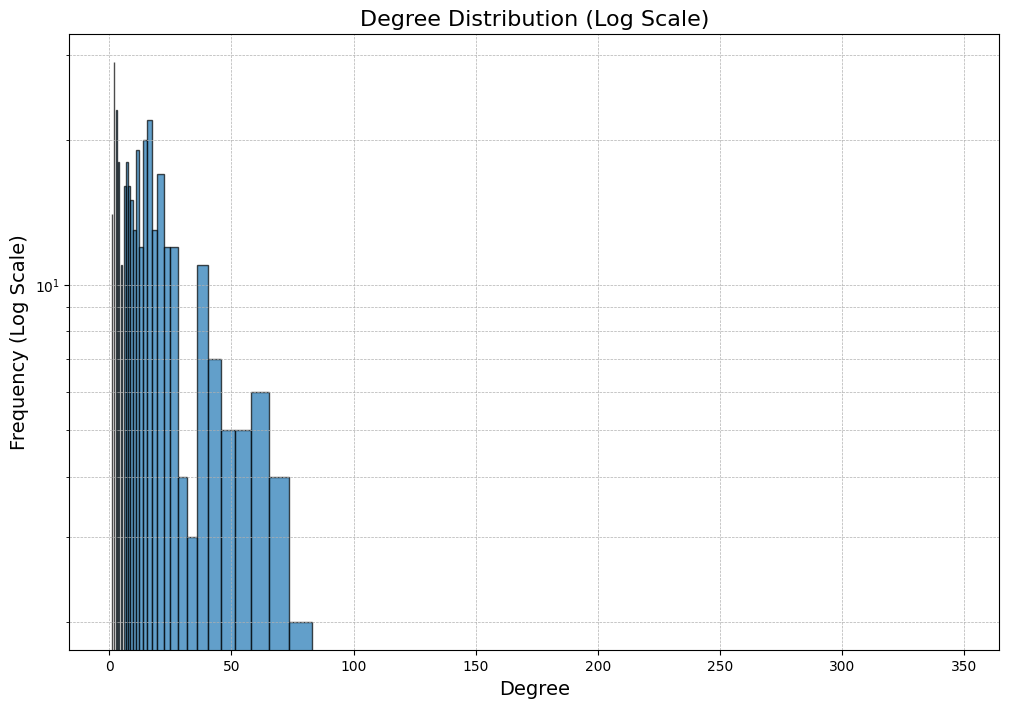

In [19]:
#Task 2 :
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np

G = nx.read_edgelist('facebook_combined.txt', nodetype=int)
ego_node = 0
ego_network = nx.ego_graph(G, ego_node)

# Computing the degree for each node and sorting 
degree_dict = dict(ego_network.degree())
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Identifying top 50 nodes
top_50_nodes = sorted_degree[:50]

# If the top 50 nodes have similar degrees, continueing to the next 50 nodes until a significant variation is noticed
#here threshold is considered as 5
threshold = 5 
extended_top_nodes = top_50_nodes
for i in range(50, len(sorted_degree), 50):
    next_50_nodes = sorted_degree[i:i+50]
    if next_50_nodes and abs(next_50_nodes[-1][1] - top_50_nodes[-1][1]) < threshold:
        extended_top_nodes.extend(next_50_nodes)
    else:
        break

# Print the degree of the extended top nodes
print("Degrees of the top 50 nodes:")
for node, degree in extended_top_nodes:
    print(f"Node {node}: Degree {degree}")

# Plot the degree distribution
degrees = [d for n, d in sorted_degree]
plt.figure(figsize=(12, 8))
bins = np.logspace(np.log10(1), np.log10(max(degrees)), num=50)
plt.hist(degrees, bins=bins, edgecolor='black', alpha=0.7, log=True)
plt.title('Degree Distribution (Log Scale)', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.show()
















In [28]:
# Task 3 : Path Analysis Between Random Nodes
import random
G = nx.read_edgelist('facebook_combined.txt', nodetype=int)
ego_node = 0
ego_network = nx.ego_graph(G, ego_node)


random_pairs = [(random.choice(list(ego_network.nodes())), random.choice(list(ego_network.nodes()))) for _ in range(5)]

# Computing shortest paths
shortest_paths = {}
for (u, v) in random_pairs:
    shortest_paths[(u, v)] = nx.shortest_path(ego_network, source=u, target=v)

# Displaying the shortest paths
for pair, path in shortest_paths.items():
    print(f"Shortest path between {pair[0]} and {pair[1]}: {path}")


Shortest path between 42 and 267: [42, 0, 267]
Shortest path between 120 and 193: [120, 0, 193]
Shortest path between 301 and 92: [301, 0, 92]
Shortest path between 328 and 19: [328, 0, 19]
Shortest path between 263 and 16: [263, 0, 16]


In [29]:
# Task 4 : High-Degree Node Identification in Paths
# Let, threshold 10
threshold = 10

# Identifying high-degree nodes in each path
high_degree_nodes = {}
for pair, path in shortest_paths.items():
    high_degree_nodes[pair] = [node for node in path if degree_dict[node] > threshold]

# Displaying high-degree nodes in each path
for pair, nodes in high_degree_nodes.items():
    print(f"High-degree nodes in path between {pair[0]} and {pair[1]}: {nodes}")


High-degree nodes in path between 42 and 267: [0]
High-degree nodes in path between 120 and 193: [0]
High-degree nodes in path between 301 and 92: [0, 92]
High-degree nodes in path between 328 and 19: [0, 19]
High-degree nodes in path between 263 and 16: [0]


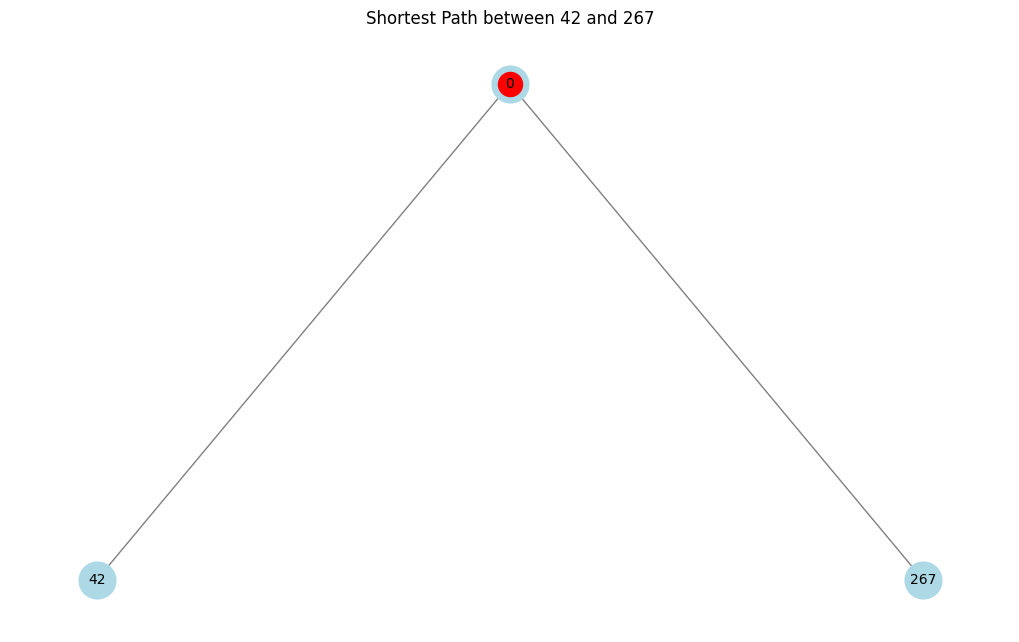

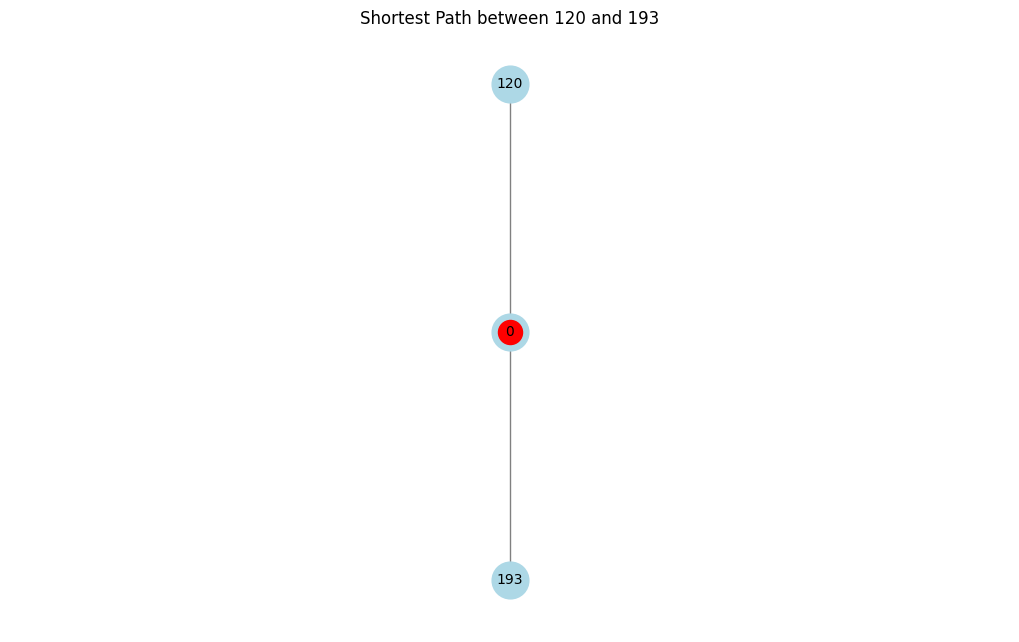

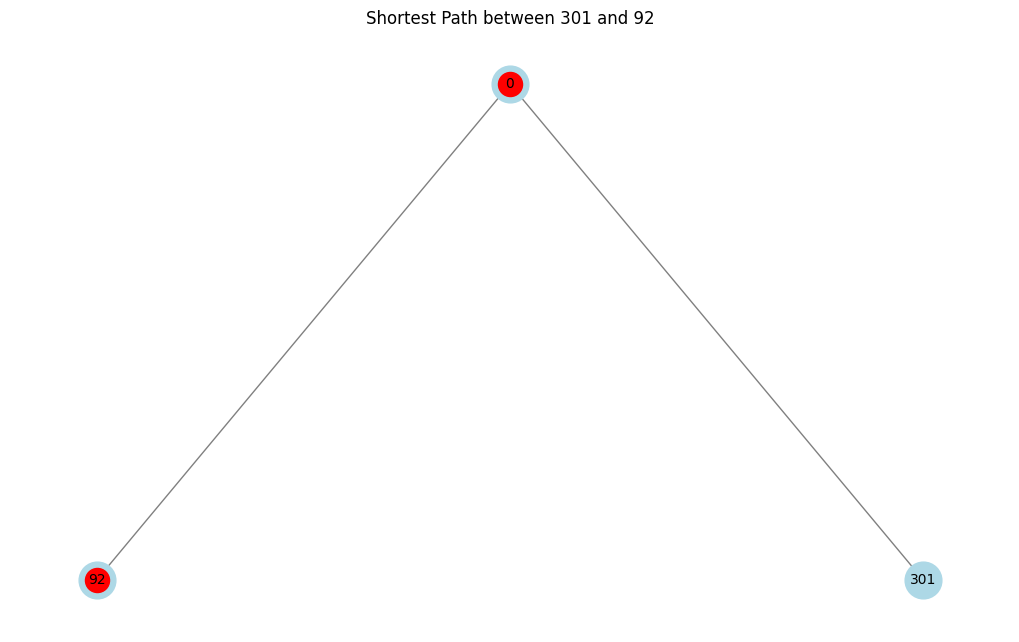

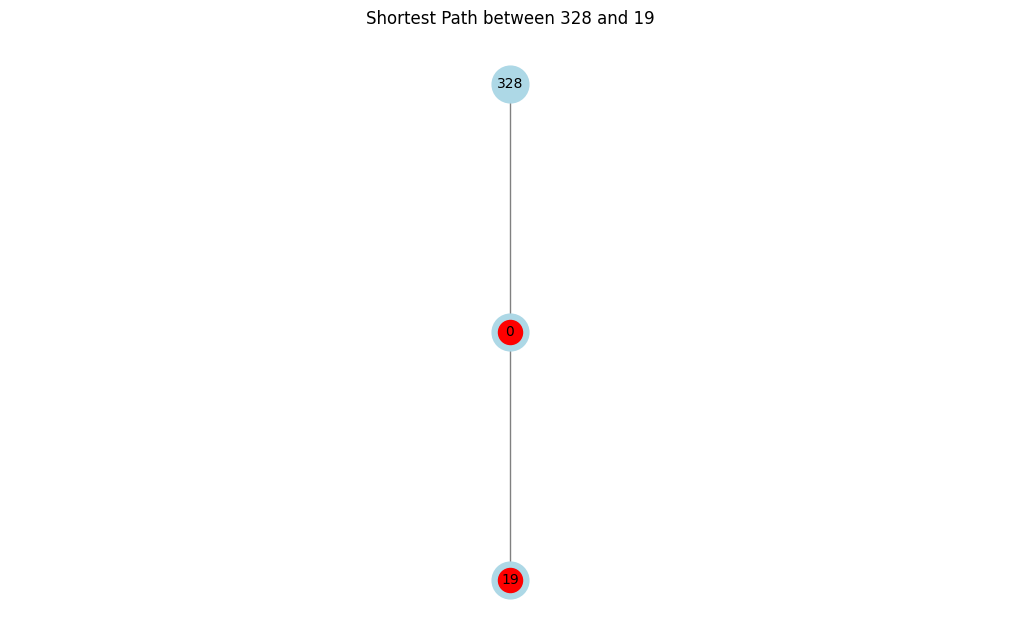

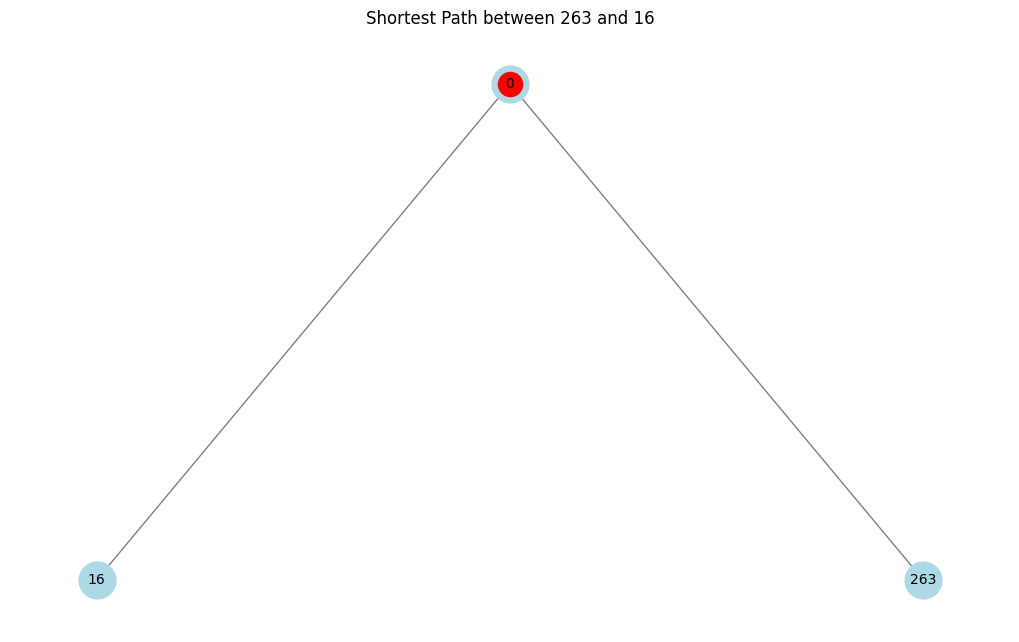

In [30]:
# Task 5 : Visualization with GraphViz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pygraphviz as pgv

# Visualize each path
for pair, path in shortest_paths.items():
    subgraph = ego_network.subgraph(path)
    pos = graphviz_layout(subgraph, prog='dot')
    plt.figure(figsize=(10, 6))
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
    nx.draw_networkx_nodes(subgraph, pos, nodelist=high_degree_nodes[pair], node_color='red')
    plt.title(f'Shortest Path between {pair[0]} and {pair[1]}')
    plt.show()


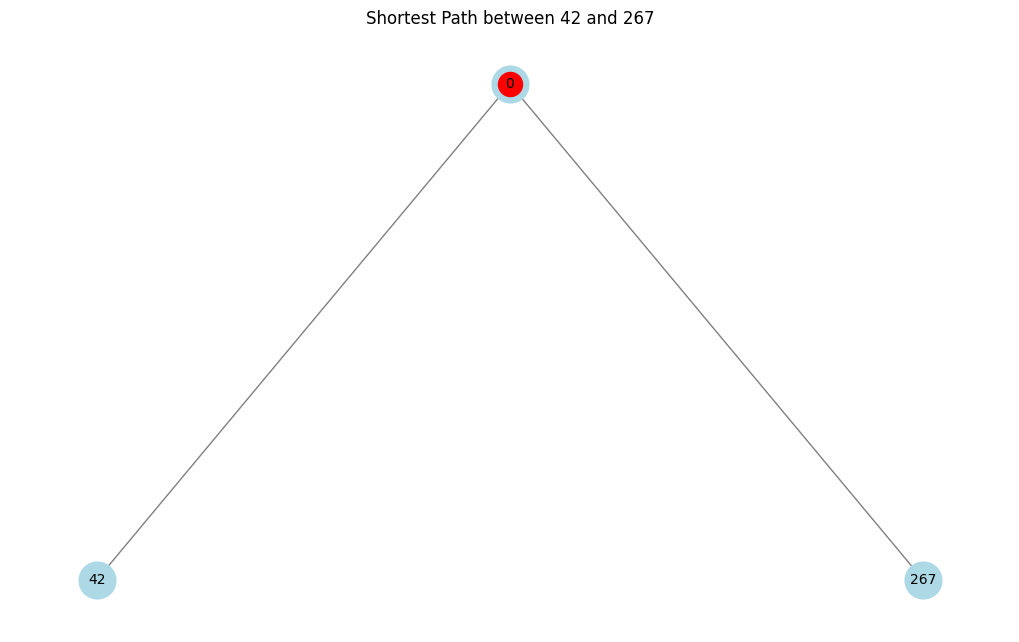

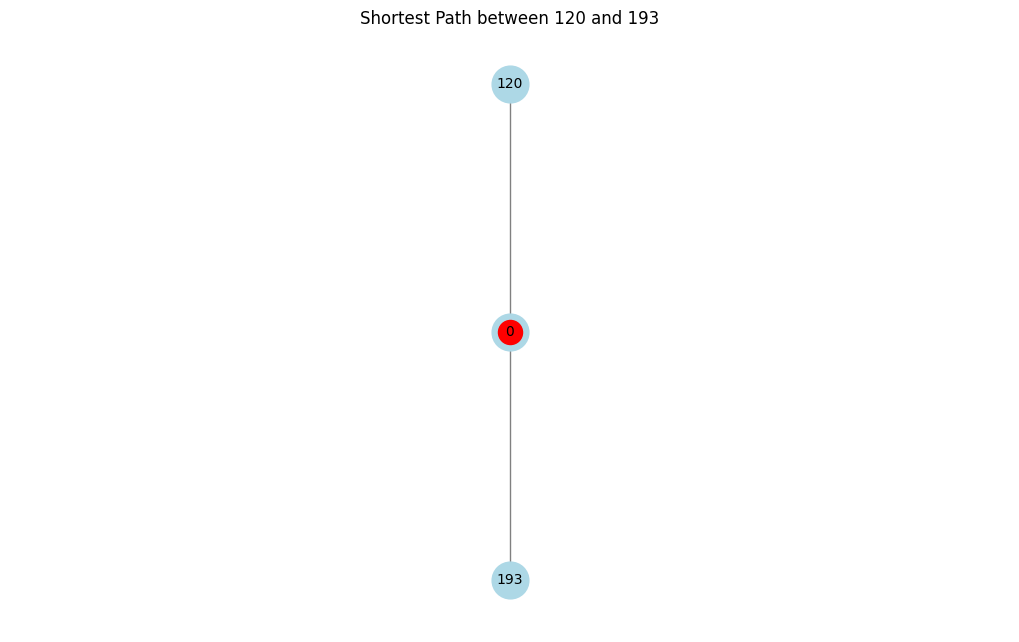

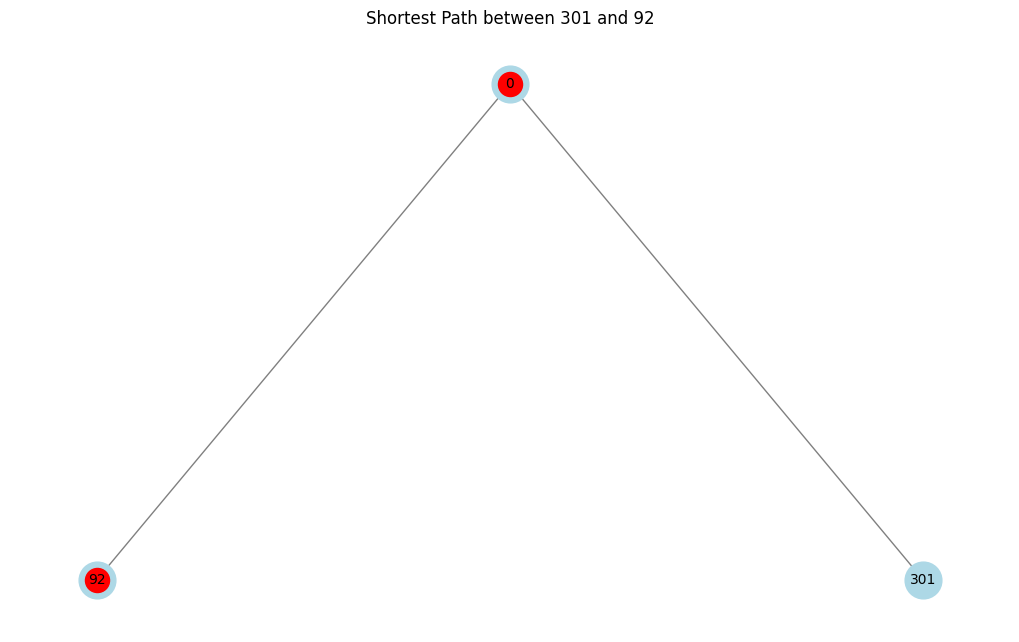

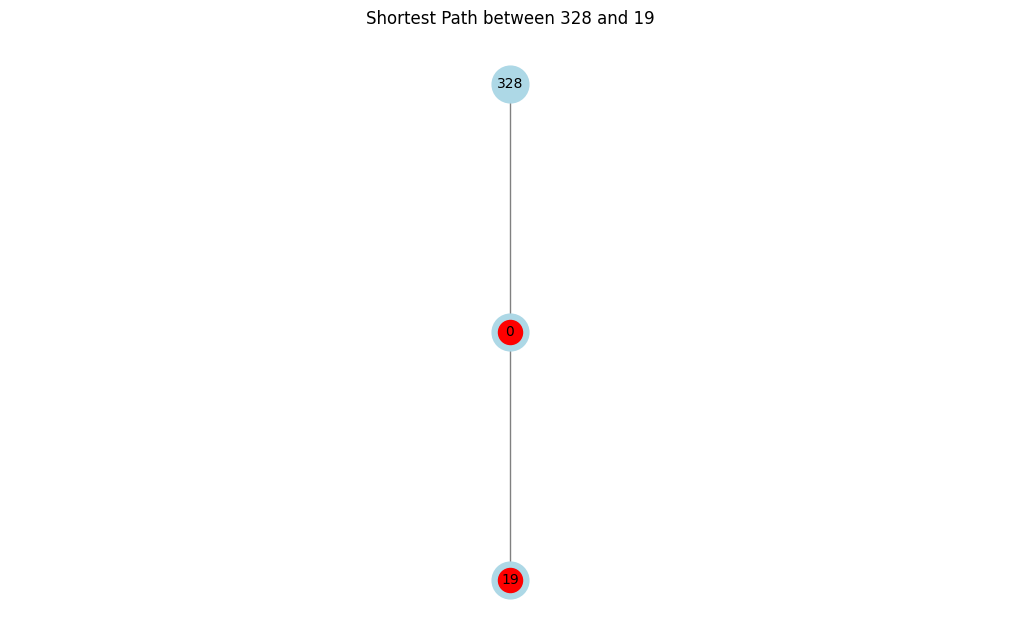

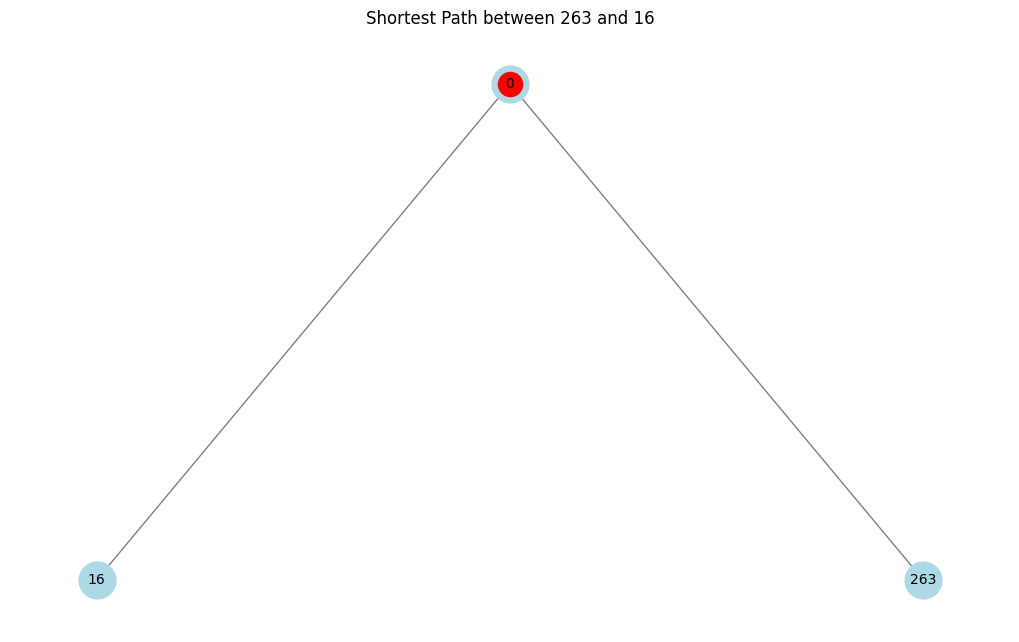

In [30]:
# Task 5 : Visualization with GraphViz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pygraphviz as pgv

# Visualize each path
for pair, path in shortest_paths.items():
    subgraph = ego_network.subgraph(path)
    pos = graphviz_layout(subgraph, prog='dot')
    plt.figure(figsize=(10, 6))
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
    nx.draw_networkx_nodes(subgraph, pos, nodelist=high_degree_nodes[pair], node_color='red')
    plt.title(f'Shortest Path between {pair[0]} and {pair[1]}')
    plt.show()


In [29]:
# Task 5 : Visualization with GraphViz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pygraphviz as pgv

# Visualize each path
for pair, path in shortest_paths.items():
    subgraph = ego_network.subgraph(path)
    A = to_agraph(subgraph)  
    for node in subgraph.nodes():
        n = A.get_node(node)
        n.attr['shape'] = 'circle'  
        n.attr['color'] = 'lightblue'
        n.attr['style'] = 'filled'
    if pair in high_degree_nodes:
        for node in high_degree_nodes[pair]:
            n = A.get_node(node)
            n.attr['shape'] = 'square'  
            n.attr['color'] = 'red'    
            n.attr['style'] = 'filled'
            A.layout(prog='dot')

    # Output the graph visualization to a PNG image
    output_filename = f'shortest_path_{pair[0]}_{pair[1]}.png'
    A.draw(output_filename)

    # Display the image in the notebook (optional)
    img = plt.imread(output_filename)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide the axis for a cleaner visualization
    plt.title(f'Shortest Path between {pair[0]} and {pair[1]}')
    plt.show()

TypeError: 'int' object is not iterable

In [28]:
## Task 5 : Visualization of each path with GraphViz
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph
import matplotlib.pyplot as plt
for pair, path in shortest_paths.items() :
    subgraph = ego_network.subgraph(path)
    A = to_agraph(subgraph)  
    for node in subgraph.nodes():
        n = A.get_node(node)
        n.attr['shape'] = 'circle'  
        n.attr['color'] = 'lightblue'
        n.attr['style'] = 'filled'
    if pair in high_degree_nodes:
        for node in high_degree_nodes[pair]:
            n = A.get_node(node)
            n.attr['shape'] = 'square'  
            n.attr['color'] = 'red'    
            n.attr['style'] = 'filled'
    
   
    A.layout(prog='dot')

    # Output the graph visualization to a PNG image
    output_filename = f'shortest_path_{pair[0]}_{pair[1]}.png'
    A.draw(output_filename)

    # Display the image in the notebook (optional)
    img = plt.imread(output_filename)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide the axis for a cleaner visualization
    plt.title(f'Shortest Path between {pair[0]} and {pair[1]}')
    plt.show()

TypeError: 'int' object is not iterable